# VAE (Variational Autoencoder)

Como último experimento dessa seção de explorações sobre os mais importantes e marcantes algoritmos durante a história das redes neurais, foi escolhido um algoritmo voltado para o aprendizado não supervisionado, o VAE. Variational Autoencoder é um dos modelos mais elegantes e importantes dentro do aprendizado não supervisionado e da aprendizagem profunda (Deep Learning). Ele combina ideias de autoencoders e de modelagem probabilística, e é usado principalmente para geração de dados, redução de dimensionalidade, e aprendizado de representações latentes.

Para isso, será primeiramente explorado o funcionamento de forma gerado de um autoenconder, e posteriormente comparado e exemplificado o diferencial do *Variational* dentro do autoenconder.

Por fim, será utilizado ambos os algortimos no famoso dataset de algarismos escritos [**MNIST**](https://www.kaggle.com/datasets/hojjatk/mnist-dataset).

## O que é um Autoencoder?

Um Autoencoder é um tipo de rede neural artificial usada para aprender representações compactas de dados de forma não supervisionada, como já citado.
Isso significa que ele não precisa do target disponível para ser treinado, ele aprende de outro modo como se aperfeiçoar. Em outras palavras, um autoencoder aprende a “comprimir” e “descomprimir” dados, tentando manter o máximo de informação relevante possível.

A estrutura básica de um autoenconder é composta por duas partes, o encoder e o decoder. O encoder recebe o dado origina, por exemplo, uma imagem de 28×28 pixels e o transforma em uma representação comprimida chamada de vetor latente. Essa parte “aprende” como extrair as características mais importantes do dado. Já a outra parte é, o decoder, tenta reconstruir o dado original a partir dessa representação compacta. Desse modo, com o aprendizado dos dados mais importantes e posteriormente a reconstrução do conjunto de dados, fica explícito que é nesse momento que existe a métrica utilizada para o treinamento. Isto é, "O algoritmo conseguiu reconstruir a imagem de uma forma fidedigna a realidade?". Desse modo, a rede neural é treinada utilizando a diferença entre o *x* de entrada e o $\hat{x}$.

Com isso, o que é gerado de aprendizado é quais são os dados resumidos que permitem reconstruir o conjunto original de dados, descartando dados ruidosos ou redundantes. Esse aprendizado se dá principalmente na estrutura do espaço latente, a camada da rede que une o enconder ao decoder. Essa camada é a camada com menor quantidade de dimensões, agrupando todos os dados principais de uma forma super compacta, condensando a informação importante dos dados e aprendendo a abstração dos fatores subjacentes. Dentro dele, a rede neural aprende a representar de forma compacta e estruturada o que é importante nos dados de entrada, de modo que essa representação possa ser decodificada para reconstruir, ou gerar dados semelhantes.

Normalmente, um autoencoder é utilizado para:

1. Redução de dimensionalidade
2. Detecção de anomalias
3. Remoção de ruído
4. Compressão de dados
5. Aprendizado de representações

## Qual a diferença entre um Autoencoder e o Variational Autoenconder?

Como dito anteriomente, o autoencoder clássico é uma rede neural que aprende a codificar e decodificar dados, de forma que para cada entrada o encoder produz exatamente um vetor latente e o decoder usa esse vetor para gerar a reconstrução, utilizando como principal função de perda envolve apenas o erro de reconstrução

Já o VAE é uma generalização que traz uma abordagem probabilística no espaço latente. Em vez de codificar a entrada em um ponto fixo, o encoder estima parâmetros de uma distribuição, normalmente uma normal, expõe os dados no espaço latente a essas distribuições de modo que introduz incerteza e variabilidade no mapa latente, de modo que para cada entrada existam múltiplas possíveis representações latentes. Além disso, o modelo impõe que essa distribuição latente estimada se aproxime da função desejada, podendo ser uma normal, mas também qualquer outro tipo de distribuição, de modo que é possível criar um "gerador" de dados utilizando uma determinada função de distribuição.

Essa diferença traz impactos práticos importantes. No autoencoder clássico, como não há restrição formal sobre como os vetores latentes se organizam, os valores latentes podem ser arbitrários, com os vetores próximos no espaço latente podendo não corresponder a entradas semelhantes, e vetores latentes arbitrários podem não gerar reconstruções válidas. Já no VAE, por causa da regularização e do fato de aprender distribuições latentes, o espaço latente tende a ser bem comportado e contínuo: amostras da distribuição prior também geram saídas plausíveis. Isso torna o VAE útil como modelo generativo, de tal forma que é possível amostrar novos pontos latentes e gerar novas amostras coerentes com os dados de treino.

# Aplicação no MNIST

## VAE

Para  explorar melhor o funcionamento do desses dois algoritmos, ou melhor, o algoritmo com suas duas variações, será aplicado sobre o dataset MNIST. Esse foi carregado a partir da biblioteca do Tensor Flow, `tf.keras.datasets.mnist` e tratado de acordo. Tendo em vista que o dataset aborda imagens de algarismos, com uma dimensão de 28x28, o pré processamento sobre cada imagem foi a divisão dos pixels por 255, mantendo os valores entre $[0, 1]$.

Passando para o funcionamento do encoder e decoder, durente o encoder, será "achatado" o dataset para uma dimensão, com os 28x28 pixels, sendo representados por um vetor de dimensões $(784, 1)$. Após isso, serão feitas camadas de redução da quantidade de neurônios até alcançar a camada latente, com apenas dois neurônios, onde serão calculadas as seguintes medidas, média e desvio padrão. No processo de reconstrução da imagem, o decoder reconstrói as camadas até alcançar novamente a quantidade de pixels necessários para a imagem com formatação 28x28 com o auxílio de uma função sigmóide, sendo o seu treinamento baseado em uma função de perda híbrida:

1. **Reconstrução** (`BCE(x, x_hat)`)
2. **KL** entre `q(z|x)` e o prior `p(z) = N(0, I)`

Onde a primeira parte é responsável por medir o quão bem o decodificador consegue reconstruir o dado original a partir da amostra do vetor latente, sendo algo é análogo à função de perda de um autoencoder tradicional, por exemplo, o erro quadrático médio entre entrada e saída. Já a segunda parte, mede a diferença entre a distribuição aproximada do espaço latente e a distribuição alvo, no caso estudado, a normal. O objetivo dessa segunda parte da função de perda é forçar o espaço latente aprendido a se parecer com uma distribuição normal padrão, de modo que evita que o modelo memorize cada dado isoladamente e garante que o espaço latente seja contínuo e interpolável. Com essas duas características extras é possível gerar novas amostras apenas amostrando novos dados, sem precisar de dados reais.

Partindo então para o código em si, em primeiro lugar, foram setados todos os parêmtros necessários para o experimento funcionar:
- Setar a seed de randomização para possibilitar reprodutibilidade
- Setar os parâmetros utilizados
- Importar as bibliotecas usadas
    - random
    - numpy
    - tensortflow
    - matplotlib
    - sklearn
    - pathlib
    - keras
- Criar diretório para salvar os resultados encontrados

In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # GPU não está sendo utilizada
os.environ["KERAS_BACKEND"] = "tensorflow"

import warnings

warnings.filterwarnings("ignore")

import os
import random
import warnings
from pathlib import Path

import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import Model, layers, ops
from sklearn.manifold import TSNE

# SET SEED
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# PARÂMETROS
BATCH_SIZE = 128
LATENT_DIM = 2
EPOCHS = 100
LEARNING_RATE = 1e-3
VALIDATION_SPLIT = 0.1

outdir = Path("figs")
outdir.mkdir(exist_ok=True)

Como já citado anteriormente,  o dataset foi importado da própria biblioteca tensorflow, utilizando o módulo de datasets dele: `tf.keras.datasets`. Importante citar que nesse módulo, o conjunto de dados de treino e teste já estão separados e podem ser carregados diretamente do método.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Após isso foi normalizada a entrada dos dados como citado, dividindo tudo por 255 para os dados ficarem na distribuição entre $[0, 1]$

In [3]:
x = x_train.astype("float32") / 255.0
y = y_train.astype("int64")
x = np.expand_dims(x, axis=-1)

A separação do conjunto para validação nesse caso foi feita manualmente, a partir das funções de permutação da numpy, e após isso a preparação do formato dos dados para entrada na biblioteca do tensorflow, por isso da aplicação dos diversos métodos de preparação.

In [4]:
n = x.shape[0]
n_val = int(VALIDATION_SPLIT * n)

idx = np.random.RandomState(SEED).permutation(n)
x = x[idx]; y = y[idx]
x_val, y_val = x[:n_val], y[:n_val]
x_train_, y_train_ = x[n_val:], y[n_val:]

train_ds = (
    tf.data.Dataset.from_tensor_slices((x_train_, x_train_, y_train_))
    .cache()
    .shuffle(buffer_size=len(x_train_), seed=SEED)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = (
    tf.data.Dataset.from_tensor_slices((x_val, x_val, y_val))
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

Com os conjuntos de treino e validação separados, é possível iniciar o processo de treinamento e preparação dos dados para entrada na rede. Dito isso, são setadas as camadas que o encoder terá, com uma entrada de 784, visto o 28x28 de forma achatada, que será reduzido para 512, e então 256, até ser reduzido para o tamanho do espaço latente escolhido. Para a aplicação em questão, será utilizado um espaço latente de 2 dimensões, uma vez que possibilita a visualização da separação dos dados através de um gráfico.

In [5]:
input_img = layers.Input(shape=(28, 28, 1), name="img")

# --- Encoder ---
x = layers.Flatten()(input_img)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
z_mean = layers.Dense(LATENT_DIM, name="z_mean")(x)
z_log_var = layers.Dense(LATENT_DIM, name="z_var")(x)

O método `sampling()` criado foi exclusivamente para forçar o treinamento do espaço latente utilizando $\mu$ e $\sigma$, porém deixando o gradiente fluir entre $\mu$ e $\log{\sigma^2}$, pois se não o gradiente não seria derivavel.

In [6]:
def sampling(args):
    mu, log_var = args
    eps = keras.random.normal(shape=ops.shape(mu), mean=0.0, stddev=1.0, seed=SEED)
    return mu + ops.exp(0.5 * log_var) * eps

In [7]:
z = layers.Lambda(sampling, name="z")([z_mean, z_log_var])

encoder_vae = Model(input_img, [z_mean, z_log_var, z], name="encoder")
encoder_vae.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)    │ (None, 28, 28, 1) │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 784)       │          0 │ img[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │    401,920 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │    131,328 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        514 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_var (Dense)       │ (None, 2)         │        514 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_var[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 534,276 (2.04 MB)

 Trainable params: 534,276 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

O decoder tem a mesma estrutura do enconder porém ao contrário, aumentando gradativamente a quantidade dos nerônios até chegar nos 784 neurônios, que representarão os 28x28 pixels, reconstruindo por completo a imagem do algorismo. Durante a reconstrução, a função de ativação dos neurônios foi a relu, com a sigmoide sendo utilizada na camada de saída. 

In [8]:
# --- Decoder ---
latent_inputs = layers.Input(shape=(LATENT_DIM,), name="z_sampling")
x = layers.Dense(256, activation="relu")(latent_inputs)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(28 * 28, activation="sigmoid")(x)
output_img = layers.Reshape((28, 28, 1))(x)

decoder_vae = Model(latent_inputs, output_img, name="decoder")
decoder_vae.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ z_sampling (InputLayer)         │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 784)            │       402,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 534,544 (2.04 MB)

 Trainable params: 534,544 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Para melhor análise sobre o processo de treinamento da rede, foram criados trackers para acompanhar as medidas de perdas durante cada uma das épocas de treinamento.

In [9]:
total_tracker = keras.metrics.Mean(name="loss")
recon_tracker = keras.metrics.Mean(name="recon_loss")
kl_tracker = keras.metrics.Mean(name="kl_loss")

A classe `VAE()`, foi criada para auxiliar no processo de treinamento de aplicação da rede neural como um todo. Após estruturar a quantidade de camadas e as funções de ativação no momento de enconder e decoder, o processo de treinamento foi consolidado na classe para tornar mais fácil o processo de atualização dos pesos e melhora da rede neural.

In [10]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

        self.total_loss_tracker = keras.metrics.Mean(name="loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker,
                self.reconstruction_loss_tracker,
                self.kl_loss_tracker]

    def _compute_losses(self, x, training=False):
        z_mean, z_log_var, z = self.encoder(x, training=training)
        recon = self.decoder(z, training=training)

        bce = keras.losses.binary_crossentropy(x, recon)
        recon_loss = ops.mean(ops.sum(bce, axis=(1, 2)))

        kl = -0.5 * (1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var))
        kl_loss = ops.mean(ops.sum(kl, axis=1))

        total = recon_loss + kl_loss
        return total, recon_loss, kl_loss

    def train_step(self, data):
        x = data[0] if isinstance(data, (tuple, list)) else data
        with tf.GradientTape() as tape:
            total, recon_loss, kl_loss = self._compute_losses(x, training=True)
        grads = tape.gradient(total, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total)
        self.reconstruction_loss_tracker.update_state(recon_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {"loss": self.total_loss_tracker.result(),
                "reconstruction_loss": self.reconstruction_loss_tracker.result(),
                "kl_loss": self.kl_loss_tracker.result()}

    def test_step(self, data):
        x = data[0] if isinstance(data, (tuple, list)) else data
        total, recon_loss, kl_loss = self._compute_losses(x, training=False)
        self.total_loss_tracker.update_state(total)
        self.reconstruction_loss_tracker.update_state(recon_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {"loss": self.total_loss_tracker.result(),
                "reconstruction_loss": self.reconstruction_loss_tracker.result(),
                "kl_loss": self.kl_loss_tracker.result()}

    def call(self, inputs, training=False):
        z_mean, z_log_var, z = self.encoder(inputs, training=training)
        return self.decoder(z, training=training)

A classe herda de `keras.Model` e encapsula um Autoencoder Variacional com laço de treino customizado. Na sua entrada ela recebe dois modelos Keras: um `encoder`, que deve devolver três tensores: z_mean; z_log_var e uma amostra latente z. Já o `decoder`, mapeia z de volta para o espaço de entrada. Nessa inicialização também são criados três rastreadores de métricas, para ser possível analisar posteriormente os dados coletados durante a aplicação do `fit()`.

A propriedade `metrics` expõe a lista desses rastreadores para o mecanismo do Keras. Isso permite que o framework saiba quais métricas devem ser resetadas no início de cada época e mostradas no progresso do treinamento.

O método privado `_compute_losses()` é responsável pelo cálculo e mensuração da perda durante a aplicação do `fit()`. A perda de reconstrução é calculada com `binary_crossentropy()` elemento a elemento, depois, soma-se sobre as dimensões espaciais e tira-se a média no batch.

O `train_step()` personaliza o passo de treinamento por batch. A entrada `data` pode vir como um tensor `x` ou uma tupla/lista, aqui, qualquer `y` é ignorado e usa-se apenas `x`. Dentro de um `tf.GradientTape`, a classe chama `_compute_losses`, calcula os gradientes da perda total em relação a todos os pesos treináveis, aplica-os via `self.optimizer.apply_gradients()` e atualiza os rastreadores de métricas. O retorno desse método são os valores correntes de loss, reconstruction_loss e kl_loss.

O `test_step()` faz a avaliação por batch em validação/teste. A assinatura e o desembrulho de `data` são idênticos ao `train_step`, mas não há fita de gradiente nem atualização de pesos, apenas computa as perdas e atualiza as métricas e retorna o mesmo dicionário de logs.

Por fim, o `call()` define a passagem direta do modelo quando você o chama como função. Ele repassa `inputs` ao `encoder` obtendo `z_mean`, `z_log_var`, `z` e retorna apenas a reconstrução `decoder()`. Em outras palavras, o `call` serve para inferência/geração, enquanto o cálculo das perdas completas fica concentrado em `_compute_losses`.

In [11]:
vae = VAE(encoder_vae, decoder_vae)
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE))
vae.summary()

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Functional)            │ ((None, 2), (None, 2), │       534,276 │
│                                 │ (None, 2))             │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │       534,544 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,068,820 (4.08 MB)

 Trainable params: 1,068,820 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

Aplicando o método `fit()` então tem se que todo o histórico do treinamento e atualização dos parâmetros.

In [12]:
history = vae.fit(
    train_ds.map(lambda x, x_target, y: x),
    epochs=EPOCHS,
    validation_data=val_ds.map(lambda x, x_target, y: x),
    verbose=0 #caso queira observar as métricas por época, deixar como 1
)

In [ ]:
hist = history.history

# === 1. Total Loss ===
plt.figure()
plt.plot(hist["loss"], label="train")
if "val_loss" in hist:
    plt.plot(hist["val_loss"], label="val")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("VAE - Total Loss")
plt.tight_layout()
plt.savefig(outdir / "01_total_loss.png", dpi=800)
plt.show()

In [ ]:
# === 2. Reconstruction Loss ===
plt.figure()
if "reconstruction_loss" in hist:
    plt.plot(hist["reconstruction_loss"], label="train")
    if "val_reconstruction_loss" in hist:
        plt.plot(hist["val_reconstruction_loss"], label="val")
elif "recon_loss" in hist:
    plt.plot(hist["recon_loss"], label="train")
    if "val_recon_loss" in hist:
        plt.plot(hist["val_recon_loss"], label="val")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Loss")
plt.title("VAE - Reconstruction Loss")
plt.tight_layout()
plt.savefig(outdir / "02_reconstruction_loss.png", dpi=800)
plt.show()

In [ ]:
# === 3. KL Loss ===
plt.figure()
if "kl_loss" in hist:
    plt.plot(hist["kl_loss"], label="train")
    if "val_kl_loss" in hist:
        plt.plot(hist["val_kl_loss"], label="val")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("KL Divergence")
plt.title("VAE - KL Loss")
plt.tight_layout()
plt.savefig(outdir / "03_kl_loss.png", dpi=800)
plt.show()

No gráfico de **Total Loss**, observa-se uma queda acentuada nas primeiras épocas, seguida por uma estabilização gradual. Esse comportamento é típico de modelos que rapidamente ajustam os parâmetros iniciais para reconstruir as imagens e, depois, refinam lentamente o espaço latente. A perda de validação acompanha a de treinamento até cerca da 10ª época e, em seguida, se mantém ligeiramente acima, o que indica boa generalização, sem sinais evidentes de overfitting — o modelo continua aprendendo de forma estável, mas a perda de validação estabiliza antes da de treino.

O gráfico de **Reconstruction Loss** apresenta uma tendência semelhante, com redução expressiva no início e convergência por volta da 30ª época. A diferença entre as curvas de treino e validação torna-se constante após esse ponto, o que sugere que o modelo aprendeu a reconstruir bem os dados, mas ainda apresenta leve discrepância em relação aos exemplos de validação — um indicativo de pequena sobreajuste, comum em autoencoders quando o modelo começa a memorizar padrões específicos do conjunto de treino.

Já o gráfico de **KL Loss** mostra um comportamento inverso: as curvas crescem ao longo das épocas. Isso é esperado, pois o termo de divergência KL mede o quanto a distribuição latente do modelo se aproxima da distribuição normal padrão. O aumento gradual do KL indica que o VAE está aprendendo a regularizar o espaço latente, equilibrando a fidelidade da reconstrução com a suavidade e continuidade da representação. O fato de as curvas de treino e validação se sobreporem quase totalmente demonstra uma boa estabilidade nesse componente — ou seja, o modelo não está superajustando o espaço latente.

In [ ]:
val_batch = next(iter(val_ds))
x_val_batch = val_batch[0] if isinstance(val_batch, (tuple, list)) else val_batch

z_mean, _, _ = encoder_vae.predict(x_val_batch, verbose=0)
recons_np = decoder_vae.predict(z_mean, verbose=0)

n_show = 10
plt.figure(figsize=(n_show*1.2, 2.5))
x_np = x_val_batch.numpy() if hasattr(x_val_batch, "numpy") else np.array(x_val_batch)

x_np = x_val_batch.numpy()

for i in range(n_show):

    ax = plt.subplot(2, n_show, i + 1)
    plt.imshow(x_np[i].squeeze(), cmap="gray")
    plt.axis("off")

    ax = plt.subplot(2, n_show, i + 1 + n_show)
    plt.imshow(recons_np[i].squeeze(), cmap="gray")
    plt.axis("off")

plt.suptitle("Top: Originais   |   Bottom: Reconstruções")
plt.tight_layout()
plt.savefig(outdir / "05_reconstructions.png", dpi=800)
plt.show()

Observando literalmente a reconstrução é interessante perceber que na grande maioria dos números é possível um humano distinguir qual é o verdadeiro número, no entendo a nitidez da imagem se perde durante a reconstrução, visto que a ideia do autoencoder é capturar as amostras mais relevantes de dados, o que penaliza a *qualidade* da reprodução da imagem. Das 10 imagens selecionadas, é possível dizer que 7 imagens são reconstruídas de forma fidedigna ao algarismo realmente escrito. Contudo, é possível perceber que existe uma confusão por parte da rede entre 7 e 9, 3 e 5.

In [ ]:
N_SAMPLES = 20

z_samples = np.random.randn(N_SAMPLES, LATENT_DIM).astype("float32")
gen = decoder_vae.predict(z_samples, verbose=0)

plt.figure(figsize=(N_SAMPLES*1.2, 1.4))

for i in range(N_SAMPLES):
    ax = plt.subplot(1, N_SAMPLES, i + 1)
    plt.imshow(gen[i].squeeze(), cmap="gray")
    plt.axis("off")

plt.suptitle("Amostras aleatórias criadas a partir do espaço latente")
plt.tight_layout()
plt.savefig(outdir / "06_random_samples.png", dpi=800)
plt.show()

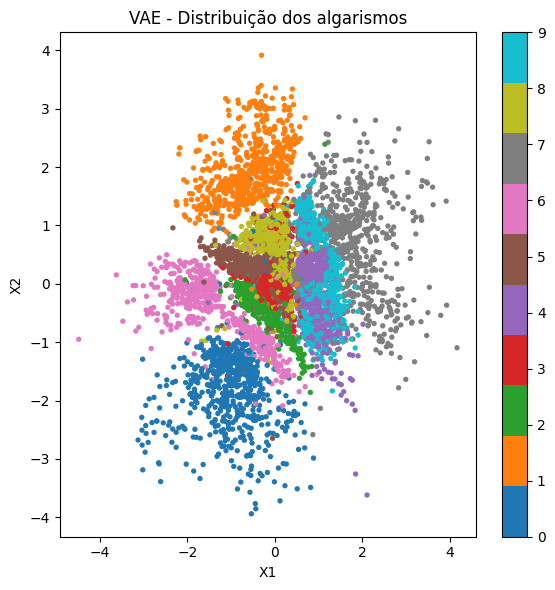

In [ ]:
z_means = []
labels = []
for xb, _, yb in val_ds:
    mu, logv, z = encoder_vae.predict(xb, verbose=0)
    z_means.append(mu)
    labels.append(yb.numpy())
z_means = np.concatenate(z_means, axis=0)
labels = np.concatenate(labels, axis=0)

proj = z_means

plt.figure(figsize=(6,6))
sc = plt.scatter(proj[:, 0], proj[:, 1], c=labels, s=8, cmap="tab10")
plt.colorbar(sc)
plt.title("VAE - Distribuição dos algarismos")
plt.xlabel("X1")
plt.ylabel("X2")
plt.tight_layout()
plt.savefig(outdir / "07_latent_space_vae.png", dpi=800)
plt.show()

Analisando como os números estão dispostos no espaço latente é interessante perceber justamente a distribuição das confusões da rede. Como citado anteriormente, a rede após o treinamento durante 100 épocas, teve uma confusão entre os algarismos, 3 e 5, 7 e 9, e observando onde eles estão distribuídos, é facilmente perceptível que eles estão se sobrepondo. Por exemplo, o 0, 1, 6 são algarismos que a rede identificou super bem, separando eles completamente do restante. No entanto, o restante está se sobrepondo, apresentando um não apredizado 100% sobre tais números.

## AE

Agora, como complemento, foi implementado também um autoencoder normal, sem o tratamento de regularização dentro do espaço latente, para justamente ser possível comparar os resultados. A diferença essencial entre os resultados de um Autoencoder (AE) e um Variational Autoencoder (VAE) estaria nas representações latentes e na fidelidade das reconstruções. O AE tradicional busca apenas comprimir e reconstruir os dados de forma determinística, aprendendo uma codificação direta que minimiza o erro de reconstrução. Por isso, suas imagens reconstruídas tendem a ser mais nítidas e detalhadas, refletindo fielmente os dígitos originais do MNIST, ainda que sem uma estrutura probabilística subjacente.

Já o VAE introduz uma abordagem probabilística ao impor uma distribuição sobre o espaço latente, forçando o modelo a aprender representações contínuas e suavemente distribuídas. Essa regularização via termo de divergência KL faz com que as amostras do espaço latente sejam mais estruturadas e interpoláveis o que permite gerar novas imagens plausíveis, mas também traz um custo em termos de reconstrução: as imagens produzidas pelo VAE tendem a ser mais suaves e menos precisas, apresentando certa perda de nitidez em relação às reconstruções do AE.

In [17]:
# --- Encoder ---
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten()(inputs)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)

In [18]:
# --- Decoder ---
z_ae = layers.Dense(LATENT_DIM, name="z")(x)
x = layers.Dense(256, activation="relu")(z_ae)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(28*28, activation="sigmoid")(x)
outputs = layers.Reshape((28, 28, 1))(x)

A estrutura das camadas e quantidades de neurônios utilizados foi a mesma, justamente para ser possível a comparação apenas pela aplicação da regularização e aproximação da distribuição normal no espaço latente. Ou seja, está sendo testado apenas a diferença na tratativa do espaço latente, tudo mais constante.

In [19]:
ae = Model(inputs, outputs, name="autoencoder")
ae.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE),
           loss="binary_crossentropy")
ae.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ z (Dense)                       │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 784)            │       402,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,068,306 (4.08 MB)

 Trainable params: 1,068,306 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
hist_ae = ae.fit(
    train_ds.map(lambda x, x_target, y: (x, x)),
    validation_data=val_ds.map(lambda x, x_target, y: (x, x)),
    epochs=EPOCHS,
    verbose=0
)

In [21]:
val_batch = next(iter(val_ds))
x_val_batch = val_batch[0] if isinstance(val_batch, (tuple, list)) else val_batch

In [22]:
vae_recons = vae(x_val_batch, training=False)
ae_recons  = ae.predict(x_val_batch, verbose=0)

In [23]:
x_np = x_val_batch.numpy() if hasattr(x_val_batch, "numpy") else np.array(x_val_batch)
vae_recons_np = vae_recons.numpy() if hasattr(vae_recons,  "numpy")  else np.array(vae_recons)
ae_recons_np = ae_recons if isinstance(ae_recons, np.ndarray) else np.array(ae_recons)

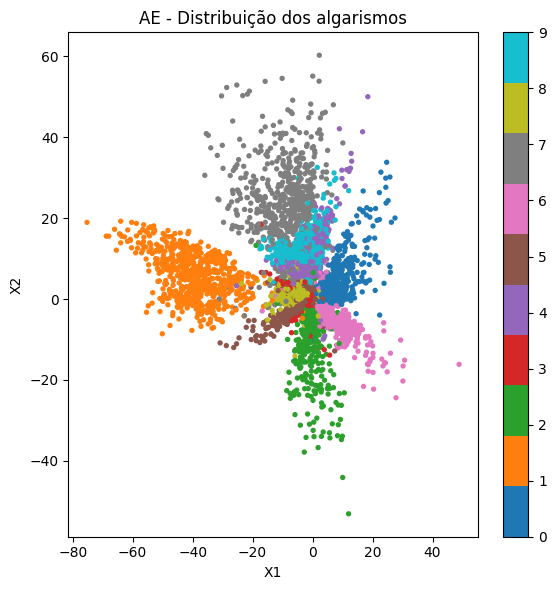

In [24]:
encoder_ae = Model(inputs=ae.input, outputs=ae.get_layer("z").output)

z_points = []
labels = []

for xb, _, yb in val_ds:
    z = encoder_ae.predict(xb, verbose=0)
    z_points.append(z)
    labels.append(yb.numpy())

z_points = np.concatenate(z_points, axis=0)
labels = np.concatenate(labels, axis=0)

plt.figure(figsize=(6,6))
sc = plt.scatter(z_points[:, 0], z_points[:, 1], c=labels, s=8, cmap="tab10")
plt.colorbar(sc)
plt.title("AE - Distribuição dos algarismos")
plt.xlabel("X1")
plt.ylabel("X2")
plt.tight_layout()
plt.savefig(outdir / "08_latent_space_ae.png", dpi=800)
plt.show()

Com relação a como o AE conseguiu distribuir os algarismos é interessante perceber que o algarismo 1 aparentemente é um número muito fácil de se aprender, porque tanto o AE quanto o VAE conseguiram distinguir muito bem do restante dos números. Porém, com relação ao restante dos números, é claro que o AE tem mais sobreposições do que o VAE, com uma mistura/confusão maior entre os números.

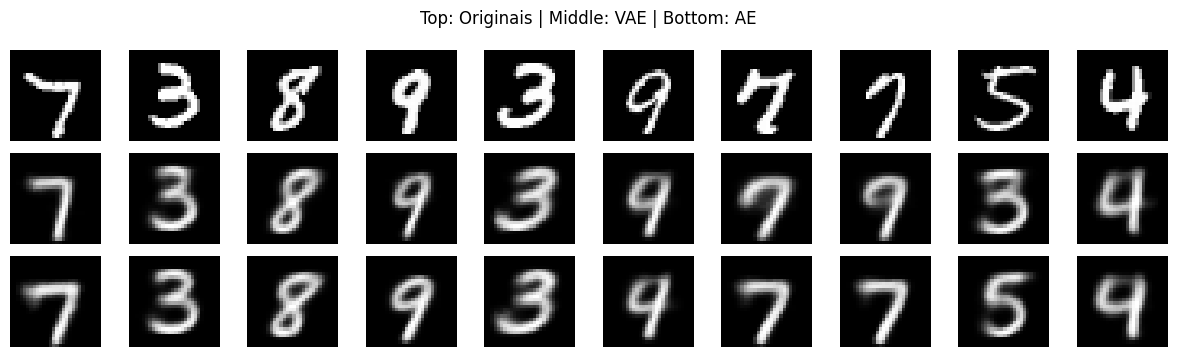

In [25]:
N_SHOW = 10

plt.figure(figsize=(N_SHOW*1.2, 3.6))
for i in range(N_SHOW):
    # Originais
    ax = plt.subplot(3, N_SHOW, i + 1)
    plt.imshow(np.squeeze(x_np[i]), cmap="gray")
    plt.axis("off")

    # VAE
    ax = plt.subplot(3, N_SHOW, i + 1 + N_SHOW)
    plt.imshow(np.squeeze(vae_recons_np[i]), cmap="gray")
    plt.axis("off")

    # AE
    ax = plt.subplot(3, N_SHOW, i + 1 + 2*N_SHOW)
    plt.imshow(np.squeeze(ae_recons_np[i]), cmap="gray")
    plt.axis("off")

plt.suptitle("Top: Originais | Middle: VAE | Bottom: AE")
plt.tight_layout()
plt.savefig(outdir / "09_ae_vs_vae_recon.png", dpi=800)
plt.show()

Na comparação entre as reconstruções apresentadas, observa-se que tanto o Autoencoder (AE) quanto o Variational Autoencoder (VAE) conseguiram capturar a estrutura geral dos dígitos originais do MNIST, preservando o formato básico e a legibilidade dos números. No entanto, há diferenças sutis, porém importantes, na qualidade visual das imagens reconstruídas.

As reconstruções feitas pelo **VAE** tendem a apresentar um aspecto mais suave e difuso, com contornos levemente borrados e menos definidos. Isso ocorre porque o VAE introduz variabilidade no processo de codificação ao amostrar pontos do espaço latente segundo distribuições probabilísticas, o que promove um espaço latente contínuo e regularizado, mas reduz a precisão pixel a pixel.

Já as reconstruções do **AE** mostram-se mais nítidas e detalhadas, reproduzindo com maior fidelidade os traços originais dos dígitos. Isso se deve ao fato de o AE aprender uma representação determinística, que busca minimizar diretamente o erro de reconstrução, sem a necessidade de balancear esse objetivo com o termo de divergência KL presente no VAE.

Em síntese, o AE oferece reconstruções visualmente mais precisas e definidas, enquanto o VAE sacrifica parte dessa nitidez em prol de um espaço latente mais estruturado e útil para tarefas de geração e interpolação de novos dígitos.